# Lab05 Python Data Science with Pandas

In [2]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [3]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [4]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df_city_cou=df[['city','country']]
df_city_cou.head()

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [5]:
# Q2: how to get the first 5 rows of the "city" column?
df_city=df['city'].head(5)
df_city

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [6]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[3]

lat                 51.4782
lon               -0.446081
date       05/14/2014 11:24
city               Hounslow
country      United Kingdom
Name: 3, dtype: object

In [7]:
# Q4: how to use .loc to select the first row in "country" column?
df['country'].loc[1]

'United Kingdom'

In [8]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df[['city','date']].loc[0:4]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24
4,Hounslow,05/14/2014 11:38


### Using .iloc[ ]

In [9]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[2,3]

'Hounslow'

In [10]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[300]

lat                 41.3771
lon                 2.15118
date       05/20/2014 03:18
city              Barcelona
country               Spain
Name: 300, dtype: object

## Part 2 <br /> How to select rows by some value(s)

In [11]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [12]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['city']=='Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [44]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
city_sp=df[(df['country']== 'Spain')&(df['city']!='Barcelona')]
city_sp

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [48]:
# Q11: select rows where either the city is munich, or the country is serbia
city_ms=df[(df['city']== 'Munich')|(df['country']=='Serbia')]
city_ms

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [55]:
# Q12: how many observations are west of the prime meridian?
city_west=df[df['lon']<0]
city_west

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal
5,38.723108,-9.113374,05/15/2014 11:34,Lisbon,Portugal
6,38.691944,-9.215561,05/15/2014 14:50,Lisbon,Portugal
7,38.708487,-9.136022,05/15/2014 16:49,Lisbon,Portugal
8,38.797558,-9.341000,05/16/2014 10:58,Algueirão-Mem Martins,Portugal
9,38.801171,-9.425103,05/16/2014 13:43,Sintra,Portugal


In [63]:
# Q13: get all rows that contain a city that starts with the letter G
df[df['city'].str.startswith('G')==True]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [65]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
df.city.unique()

array(['United Kingdom', 'Portugal', 'Spain', 'Poland', 'Czech Republic',
       'Germany', 'Serbia', 'Bosnia and Herzegovina', 'Croatia',
       'Montenegro', 'Kosovo', 'Macedonia (FYROM)', 'Albania', 'Greece',
       'Turkey'], dtype=object)

In [66]:
df.country.unique()

array(['United Kingdom', 'Portugal', 'Spain', 'Poland', 'Czech Republic',
       'Germany', 'Serbia', 'Bosnia and Herzegovina', 'Croatia',
       'Montenegro', 'Kosovo', 'Macedonia (FYROM)', 'Albania', 'Greece',
       'Turkey'], dtype=object)

In [67]:
df.isnull().sum()

lat        0
lon        0
date       0
city       0
country    0
dtype: int64

In [70]:
# Q15: group by country name and show the city names in each of the country
df.groupby('country')['city'].sum()

country
Albania                                                    BeratGjirokastër
Bosnia and Herzegovina                               SarajevoSarajevoMostar
Croatia                                                 PločeSplitDubrovnik
Czech Republic            Novy BohuminHranicePrerovÚstí nad OrlicíKojice...
Germany                   KümmersbruckWinkelhaidKammersteinEllhofenObers...
Greece                    KakaviaDytiki ElladaDytiki ElladaDytiki Ellada...
Kosovo                                                              Prizren
Macedonia (FYROM)                                                     Ohrid
Montenegro                                                            Kotor
Poland                    ZendekSilesian VoivodeshipDabrowa GorniczaOlku...
Portugal                  LisbonLisbonLisbonLisbonLisbonLisbonLisbonAlgu...
Serbia                                            BelgradeBelgradeSlepčević
Spain                     El Prat de LlobregatViladecansBarcelonaBarcelo...
Turk

## Part 3 <br /> How to select based on a date-time values

In [224]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [186]:
len(dt)

1759

In [187]:
# Q16: is the timestamp index unique? How can you use code to find it? 
len(dt.index.unique())
#No

1758

In [188]:
dt.loc['2014-05-14 09:07:00']

lat               51.4813
lon             -0.451011
city         West Drayton
country    United Kingdom
Name: 2014-05-14 09:07:00, dtype: object

In [189]:
# Q17: drop duplicate index 
dt=dt[~dt.index.duplicated()]
dt

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom
...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany
2014-07-09 13:14:00,48.356528,11.792183,Munich,Germany
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany


In [225]:
# the .weekday attribute determines which day of the week a date is
# 0 is sunday and 6 is saturday, M-F are 1-5
# Q18: create a weekday and a weekend dataframe
dt['date_time']=dt.index
dt.insert(loc=0, column='weekday',value=pd.to_datetime(dt['date_time'].astype(str)).dt.weekday)
dt.head()
dt=dt[['weekday']]


In [226]:
dt['weekend_indi'] = 0          # Initialize the column with default value of 0
dt.loc[dt['weekday'].isin([0, 6]), 'weekend_indi'] = "weekend"
dt.loc[dt['weekday'].isin([1,2,3,4,5]), 'weekend_indi'] = 'weekday'
dt

,weekday,weekend_indi
date,,
2014-05-14 09:07:00,2,weekday
2014-05-14 09:22:00,2,weekday
2014-05-14 10:51:00,2,weekday
2014-05-14 11:24:00,2,weekday
2014-05-14 11:38:00,2,weekday
...,...,...
2014-07-09 13:13:00,2,weekday
2014-07-09 13:14:00,2,weekday
2014-07-09 13:17:00,2,weekday


<AxesSubplot:title={'center':'Unemployment Rate\n'}>

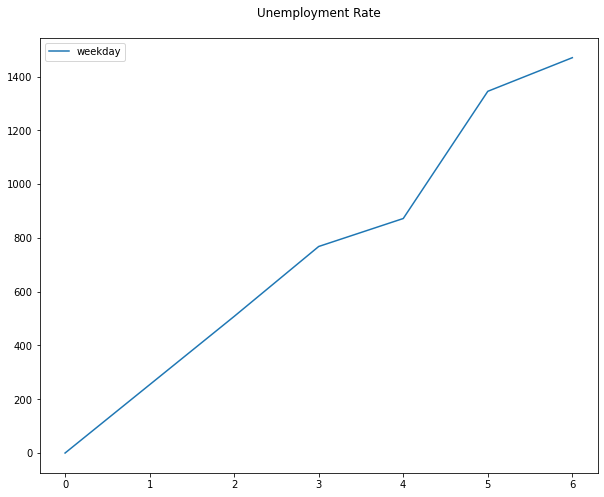

In [228]:
# Q19: calculate and plot the number of observations each day of the week has
num_week = dt.groupby('weekday', as_index=False)['weekday'].sum()
num_week.plot(figsize=(10, 8), title='Unemployment Rate\n')